In [2]:
import glob
import act
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
date='20180309'

In [4]:
ceil_file = glob.glob('/data/archive/mar/marceilM1.b1/*.' + date + '*')
ds_ceil = act.io.read_netcdf(ceil_file)
ds_ceil = act.corrections.correct_ceil(ds_ceil)

/tmp/ipykernel_893/1517716464.py:2: DeprecationWarning: act.io.armfiles.read_netcdf will be replaced in version 2.0.0 by act.io.arm.read_arm_netcdf()
  ds_ceil = act.io.read_netcdf(ceil_file)
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [5]:
ceil_file = glob.glob('/data/archive/mar/marceilpblhtM1.a0/*.' + date + '*')
ds_pbl = act.io.read_netcdf(ceil_file)

/tmp/ipykernel_893/926062008.py:2: DeprecationWarning: act.io.armfiles.read_netcdf will be replaced in version 2.0.0 by act.io.arm.read_arm_netcdf()
  ds_pbl = act.io.read_netcdf(ceil_file)


In [6]:
rwp_file = glob.glob('/data/archive/mar/mar1290bsrwpwindavgM1.b1/*.' + date + '*')
ds_rwp = act.io.read_netcdf(rwp_file)

/tmp/ipykernel_893/1477340309.py:2: DeprecationWarning: act.io.armfiles.read_netcdf will be replaced in version 2.0.0 by act.io.arm.read_arm_netcdf()
  ds_rwp = act.io.read_netcdf(rwp_file)


In [7]:
#ds_rwp['wind_dir'] = ds_rwp['wind_direction'].drop('mode')
dir = ds_rwp['wind_direction'].values[:, 0, :]
spd = ds_rwp['wind_speed'].values[:, 0, :]
heights = ds_rwp['height'].values[0, :]

da_spd = xr.DataArray(spd, dims=("time", "height"), coords={'time': ds_rwp['time'].values, 'height': heights})
da_dir = xr.DataArray(dir, dims=("time", "height"), coords={'time': ds_rwp['time'].values, 'height': heights})
ds = xr.Dataset({'wind_speed': da_spd, 'wind_direction': da_dir})

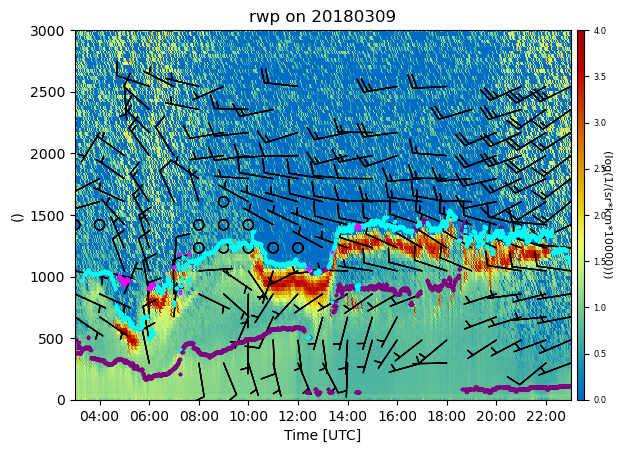

In [11]:
display = act.plotting.TimeSeriesDisplay({'ceil': ds_ceil, 'rwp': ds ,'pbl': ds_pbl})
display.plot('backscatter', dsname='ceil', cb_friendly=True, vmin=0, vmax=4)
display.set_yrng([0, 3000])
display.plot('bl_height_1', dsname='pbl', c='purple', markersize=3, linestyle='None')
display.plot('bl_height_2', dsname='pbl', c='cyan', markersize=3, linestyle='None')
display.plot('bl_height_3', dsname='pbl', c='magenta', markersize=3, linestyle='None')
display.plot_barbs_from_spd_dir('wind_speed', 'wind_direction', dsname='rwp')
plt.show()